In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib notebook

In [2]:
#Constants

#Earth-Moon-Sun Constants
G = 6.67*10**(-11)
m1 = 1.989*10**30 #sun
m2 = 5.972*10**24 #earth
m3 = 7.348*10**22 #moon

#Lemniscate Constants
#G = 1
#m1 = 1
#m2 = 1
#m3 = 1

#Burrau's Problem Constants
#G = 1
#m1 = 3
#m2 = 4
#m3 = 5

In [3]:
def der_state(t, state):
        """compute the derivative of the given state"""

#Vectors and Magnitudes

        r1 = np.array([state[0], state[2], state[4]]) #x1, y1, z1
        r2 = np.array([state[6], state[8], state[10]]) #x2, y2, z2
        r3 = np.array([state[12], state[14], state[16]]) #x3, y3, z3

        r21 = r2 - r1
        r31 = r3 - r1
        r12 = r1 - r2
        r32 = r3 - r2
        r13 = r1 - r3
        r23 = r2 - r3

        R21 = np.linalg.norm(r21)
        R31 = np.linalg.norm(r31)
        R12 = np.linalg.norm(r12)
        R32 = np.linalg.norm(r32)
        R13 = np.linalg.norm(r13)
        R23 = np.linalg.norm(r23)

#System of Differential Equations

        der = np.zeros_like(state)
        der[0] = state[1] #a0x' = a1x
        der[2] = state[3] #a0y' = a1y
        der[4] = state[5] #a0z' = a1z
        
        der[6] = state[7] #b0x' = b1x
        der[8] = state[9] #b0y' = b1y
        der[10] = state[11] #b0z' = b1y
        
        der[12] = state[13] #c0x' = c1x
        der[14] = state[15] #c0y' = c1y
        der[16] = state[17] #c0z' = c1z
        
#The Actual Equations
        
    #Sun
        der[1] = G*((m2*(state[6]-state[0])/R21**3)+(m3*(state[12]-state[0])/R31**3))
        der[3] = G*((m2*(state[8]-state[2])/R21**3)+(m3*(state[14]-state[2])/R31**3))
        der[5] = G*((m2*(state[10]-state[4])/R21**3)+(m3*(state[16]-state[4])/R31**3))
    #Earth   
        der[7] = G*((m1*(state[0]-state[6])/R12**3)+(m3*(state[12]-state[6])/R32**3))
        der[9] = G*((m1*(state[2]-state[8])/R12**3)+(m3*(state[14]-state[8])/R32**3))
        der[11] = G*((m1*(state[4]-state[10])/R12**3)+(m3*(state[16]-state[10])/R32**3))
    #Moon  
        der[13] = G*((m1*(state[0]-state[12])/R13**3)+(m2*(state[6]-state[12])/R23**3))
        der[15] = G*((m1*(state[2]-state[14])/R13**3)+(m2*(state[8]-state[14])/R23**3))
        der[17] = G*((m1*(state[4]-state[16])/R13**3)+(m2*(state[10]-state[16])/R23**3))
        
        return der
        

In [4]:
#tf for Earth-Sun-Moon System
tf = 60000000 #simulation for tf seconds

#Lemniscate
#tf = 30 #simulation for tf seconds

#Burrau's Problem Initial Conditions
#tf = 20 #simulation for tf seconds


n = 1000 #number of evaluation points
dt = tf/n
T = np.linspace(0.0, tf, n+1)


In [5]:
#Initial State
#([xa, vxa, ya, vya, za, vza, xb, vxb, yb, vyb, zb, vzb, xc, vxc, yc, vyc, zc, vzc])

#Earth-Sun-Moon Initial Conditions
state0 = [0,   0,   0,   0,  0,  0, 149.6*10**9, 0, 0, 30000, 0, 0, 1.49984*10**11, 0, 0, 33000, 0, 0]

#Lemniscate Initial Conditions
#state0 = [0.97000436,   0.4662036850,   -0.24308753,   0.4323657300,  0,  0, 0, -0.93240737, 0, -0.86473146, 0, 0, -0.97000436, 0.4662036850, 0.24308753, 0.4323657300, 0, 0]

#Burrau's Problem Initial Conditions
#state0 = [1.0, 0.0, 3.0, 0.0, 0.0, 0.0, -2.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0, 0.0, -1.0, 0.0, 0.0, 0.0]

In [6]:
#Solve_IVP

sol = integrate.solve_ivp(der_state, (0, tf), state0, t_eval=T, method="RK45")

aX = sol.y[0]
ay = sol.y[2]
az = sol.y[4]
bx = sol.y[6]
by = sol.y[8]
bz = sol.y[10]
cx = sol.y[12]
cy = sol.y[14]
cz = sol.y[16]
    

<IPython.core.display.Javascript object>


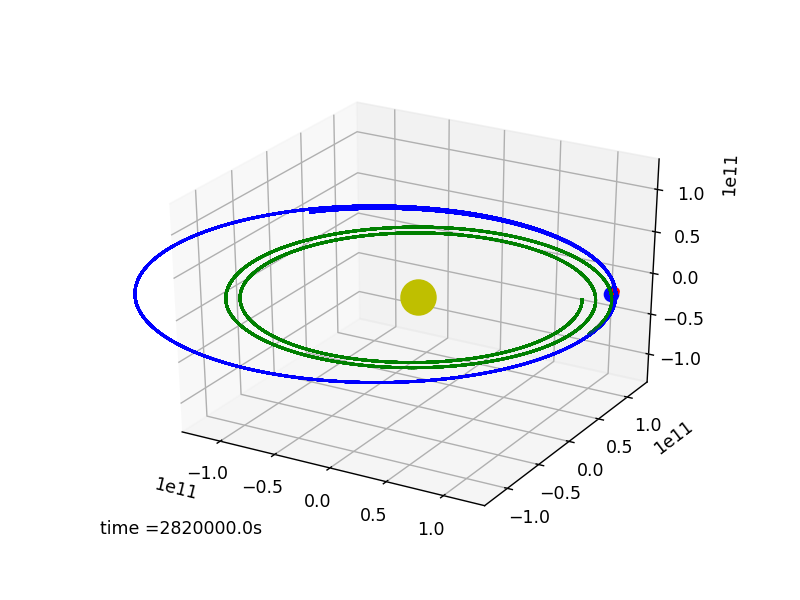

In [7]:
%matplotlib notebook
fig=plt.figure()

#Earth-Sun-Moon System
ax = fig.add_subplot(111, projection='3d', autoscale_on=False, xlim=(-13*10**10,13*10**10), ylim=(-13*10**10,13*10**10), zlim=(-13*10**10,13*10**10))

#Lemniscate and Burrau
#ax = fig.add_subplot(111, projection='3d', autoscale_on=False, xlim=(-2,2), ylim=(-2,2), zlim=(-2,2))

ax.grid()


#Earth-Mass-Sun System
mass1, = ax.plot([], [], [], 'yo', markersize=20)
mass2, = ax.plot([], [], [], 'bo', markersize=8)  
mass3, = ax.plot([], [], [], 'ro', markersize=4)

#Lemniscate and Burrau
#mass1, = ax.plot([], [], [], 'bo', markersize=5)
#mass2, = ax.plot([], [], [], 'bo', markersize=5)  
#mass3, = ax.plot([], [], [], 'bo', markersize=5) 

time_template = 'time ='
time_text = ax.text(0.05, 0.9, 1, '', transform=ax.transAxes)

def animate(i):
    mass1.set_data(aX[i],ay[i])
    mass1.set_3d_properties(az[i])
    
    domain = [aX[i-1],aX[i]]
    ranges = [ay[i-1],ay[i]]
    space = [az[i-1],az[i]]
    plt.plot(domain,ranges,space,'r')
    
    mass2.set_data(bx[i],by[i])
    mass2.set_3d_properties(bz[i])
    
    domain = [bx[i-1],bx[i]]
    ranges = [by[i-1],by[i]]
    space = [bz[i-1],bz[i]]
    plt.plot(domain,ranges,space,'g')
    
    mass3.set_data(cx[i],cy[i])
    mass3.set_3d_properties(cz[i])
    
    domain = [cx[i-1],cx[i]]
    ranges = [cy[i-1],cy[i]]
    space = [cz[i-1],cz[i]]
    plt.plot(domain,ranges,space,'b')
    
    time_text.set_text(time_template + '{:4.1f}'.format(i*dt) + 's')
    return mass1, mass2, mass3, time_text

ani = animation.FuncAnimation(fig, animate, frames=np.arange(1, len(T)),
                              interval=1, blit=True)

#This bit saves the animation to whatever folder this file is in
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=24, metadata=dict(artist='Me'), bitrate=1800)
#ani.save('ESM.mp4', writer=writer, dpi=400)